In [19]:
import os
import pandas as pd
import empyrical as empy
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [13]:
def show_cum_ret(ret):
    fig, ax = plt.subplots(figsize=(20,10))
    cm = plt.get_cmap('gist_rainbow')
    NUM_COLORS = ret.shape[1]
    ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    (1+ret).cumprod().plot(ax=ax)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_yscale("log")
    plt.show()


def drawdown_from_price(price):
    if isinstance(price, pd.Series):
        return _drawdown_from_price(price)
    elif isinstance(price, pd.DataFrame):
        return price.apply(_drawdown_from_price)
    else:
        raise non_pd_error

def _drawdown_from_price(price):
    shift_max = price.copy()
    _max = price.iloc[0]
    for i, j in price.items():
        #print('i', i)
        #print('j', j)
        _max = max(_max, j)
        shift_max[i] = _max
    return price / shift_max - 1

def return_to_price(ret, ini=100):
    price_0 = ret.dropna().iloc[:1] * 0 + ini
    price_0.index = [0]
    price = (1+ret).cumprod() * ini
    return pd.concat([price_0, price])

def drawdown_from_return(ret, ini=100):
    price = return_to_price(ret, ini)
    return drawdown_from_price(price).iloc[1:]

def avg_drawdown(ret):
    dd = drawdown_from_return(ret)
    return dd.mean()

def empy_metric(ret):
    if isinstance(ret, pd.DataFrame):
        return ret.apply(empy_metric).T
    total_return = lambda x: (1+x).prod()-1
    met_func = [
        total_return, 
        lambda x: empy.annual_return(x), 
        lambda x: empy.sharpe_ratio(x), 
        lambda x: empy.annual_volatility(x), 
        lambda x: empy.max_drawdown(x), 
        avg_drawdown]
    
    met_func_names = ['total_return', 'annual_return', 'sharpe_ratio', 'annual_volatility', 
                      'max_drawdown', 'avg_drawdown',]
    
    se = pd.Series([f(ret) for f in met_func], met_func_names)
    
    se['return/maxdd'] = -se.annual_return/se.max_drawdown
    se['return/avgdd'] = -se.annual_return/se.avg_drawdown
    
    #buy01 = ret.apply(lambda x: 0 if x==0 else 1)
    #se['buy_ratio'] = buy01.mean()
    #se['flip_ratio'] = (buy01-buy01.shift()).abs().mean()
    
    return se

In [9]:
folder = './result/2022/cashON_signal/result/script_generate/consider_downRatio_in_select/agg/check/2019/sliding3Y/cluster4groups/'

manual_f = 'vote_cases_combine1.csv'
mpt_f = 'vote_cases_combine.csv'

manual_df = pd.read_csv(os.path.join(folder, manual_f), index_col=0)
manual_df.index = pd.to_datetime(manual_df.index)

mpt_df = pd.read_csv(os.path.join(folder, mpt_f), index_col=0)
mpt_df.index = pd.to_datetime(mpt_df.index)

diff = manual_df - mpt_df
display(diff.sum())
display(diff.sum().sum())
display(diff.sum(axis=1))
display(diff.sum(axis=1).sum())
diff

corr_avg__lb10__<0.23                  0
corr_avg__lb10__>0.62                  0
corr_avg__lb10__out-of0.23&0.62        0
corr_avg__lb15__<0.26                  0
corr_avg__lb15__>0.58                  0
                                      ..
vol_std_pct__lb20__>0.18               0
vol_std_pct__lb20__out-of-0.16&0.18    0
vol_std_pct__lb50__<-0.06              0
vol_std_pct__lb50__>0.08               0
vol_std_pct__lb50__out-of-0.06&0.08    0
Length: 144, dtype: int64

0

date
2016-01-04    0
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
             ..
2019-12-24    0
2019-12-26    0
2019-12-27    0
2019-12-30    0
2019-12-31    0
Length: 1006, dtype: int64

0

,corr_avg__lb10__<0.23,corr_avg__lb10__>0.62,corr_avg__lb10__out-of0.23&0.62,corr_avg__lb15__<0.26,corr_avg__lb15__>0.58,corr_avg__lb15__out-of0.26&0.58,corr_avg__lb20__<0.27,corr_avg__lb20__>0.57,corr_avg__lb20__out-of0.27&0.57,corr_avg__lb50__<0.31,...,vol_std_pct__lb10__out-of-0.29&0.34,vol_std_pct__lb15__<-0.18,vol_std_pct__lb15__>0.24,vol_std_pct__lb15__out-of-0.18&0.24,vol_std_pct__lb20__<-0.16,vol_std_pct__lb20__>0.18,vol_std_pct__lb20__out-of-0.16&0.18,vol_std_pct__lb50__<-0.06,vol_std_pct__lb50__>0.08,vol_std_pct__lb50__out-of-0.06&0.08
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-12-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
folder = './result/2022/cashON_signal/result/script_generate/consider_downRatio_in_select/agg/check/2019/sliding3Y/cluster4groups/'

manual_f = 'ret_votes1.csv'
mpt_f = 'ret_votes.csv'

manual_df = pd.read_csv(os.path.join(folder, manual_f), index_col=0)
manual_df.index = pd.to_datetime(manual_df.index)

mpt_df = pd.read_csv(os.path.join(folder, mpt_f), index_col=0)
mpt_df.index = pd.to_datetime(mpt_df.index)

diff = manual_df - mpt_df
display(diff.sum())
display(diff.sum().sum())
display(diff.sum(axis=1))
display(diff.sum(axis=1).sum())
diff

corr_avg__lb10__<0.23                 -3.306910
corr_avg__lb10__>0.62                 -3.312496
corr_avg__lb10__out-of0.23&0.62       -3.301230
corr_avg__lb15__<0.26                 -3.305558
corr_avg__lb15__>0.58                 -3.313032
                                         ...   
vol_std_pct__lb20__>0.18              -0.081626
vol_std_pct__lb20__out-of-0.16&0.18   -0.072837
vol_std_pct__lb50__<-0.06             -3.306951
vol_std_pct__lb50__>0.08              -3.308936
vol_std_pct__lb50__out-of-0.06&0.08   -3.297695
Length: 145, dtype: float64

-424.6048791629047

date
2016-01-04   -4.131942e+02
2016-01-05   -2.439108e-14
2016-01-06    0.000000e+00
2016-01-07    3.779616e-14
2016-01-08   -8.080168e-14
                  ...     
2019-12-24   -2.199196e-14
2019-12-26    0.000000e+00
2019-12-27    1.119591e-14
2019-12-30   -3.342465e-14
2019-12-31   -2.601011e-01
Length: 1006, dtype: float64

-424.60487916290487

,corr_avg__lb10__<0.23,corr_avg__lb10__>0.62,corr_avg__lb10__out-of0.23&0.62,corr_avg__lb15__<0.26,corr_avg__lb15__>0.58,corr_avg__lb15__out-of0.26&0.58,corr_avg__lb20__<0.27,corr_avg__lb20__>0.57,corr_avg__lb20__out-of0.27&0.57,corr_avg__lb50__<0.31,...,vol_std_pct__lb10__out-of-0.29&0.34,vol_std_pct__lb15__<-0.18,vol_std_pct__lb15__>0.24,vol_std_pct__lb15__out-of-0.18&0.24,vol_std_pct__lb20__<-0.16,vol_std_pct__lb20__>0.18,vol_std_pct__lb20__out-of-0.16&0.18,vol_std_pct__lb50__<-0.06,vol_std_pct__lb50__>0.08,vol_std_pct__lb50__out-of-0.06&0.08
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,...,0.000000e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00,0.000000e+00,0.000000e+00,-3.228080e+00,-3.228080e+00,-3.228080e+00
2016-01-05,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,-1.999269e-16,...,-1.999269e-16,-1.999269e-16,0.000000e+00,0.000000e+00,-1.999269e-16,0.000000e+00,0.000000e+00,-1.999269e-16,-1.999269e-16,-1.999269e-16
2016-01-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2016-01-07,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.018419e-16,...,3.018419e-16,3.989864e-16,3.018419e-16,3.989864e-16,3.018419e-16,3.018419e-16,3.018419e-16,3.989864e-16,3.018419e-16,3.989864e-16
2016-01-08,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,...,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,-6.999609e-16,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000000e+00,-1.999269e-16,0.000000e+00,0.000000e+00,-1.999269e-16,0.000000e+00,0.000000e+00,-1.999269e-16,0.000000e+00,0.000000e+00,...,-1.999269e-16,0.000000e+00,-1.999269e-16,0.000000e+00,-1.999269e-16,-1.999269e-16,-1.999269e-16,0.000000e+00,-1.999269e-16,0.000000e+00
2019-12-26,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2019-12-27,0.000000e+00,9.996344e-17,0.000000e+00,0.000000e+00,9.996344e-17,0.000000e+00,0.000000e+00,9.996344e-17,0.000000e+00,0.000000e+00,...,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17,9.996344e-17


            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.003299  0.003299
2019-12-26   0.010258  0.010258
2019-12-27  -0.000791 -0.000791
2019-12-30  -0.009065 -0.009065
2019-12-31  -0.003685 -0.001550

[1006 rows x 2 columns]


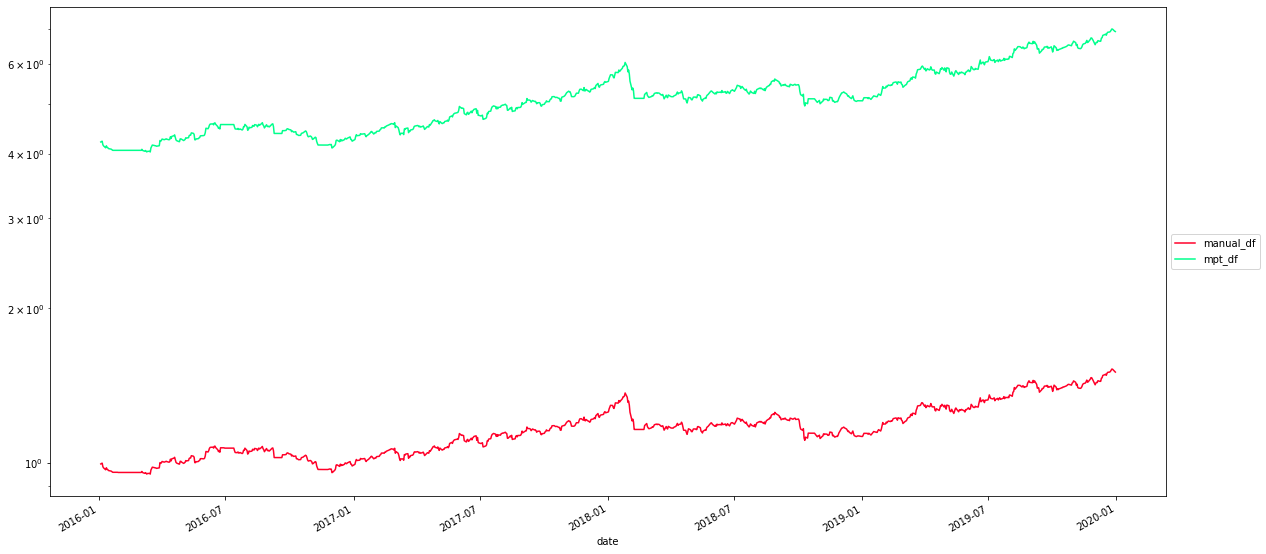

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24  -0.000280 -0.000280
2019-12-26   0.009978  0.009978
2019-12-27  -0.000278 -0.000278
2019-12-30   0.000000  0.000000
2019-12-31  -0.001676  0.000000

[1006 rows x 2 columns]


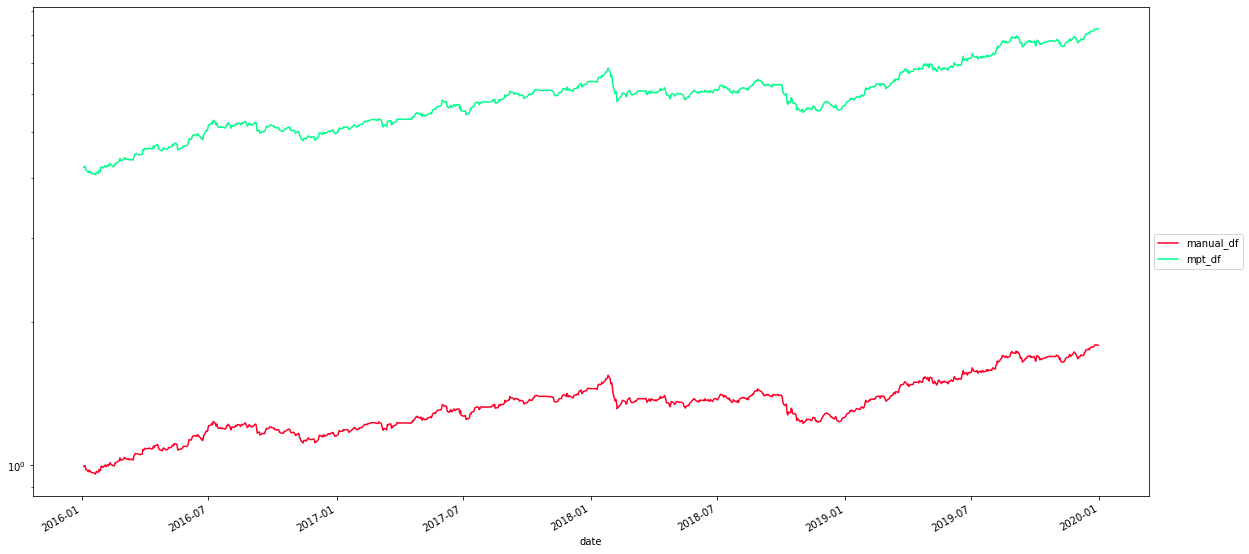

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24  -0.000280 -0.000280
2019-12-26   0.009978  0.009978
2019-12-27  -0.000278 -0.000278
2019-12-30   0.000000  0.000000
2019-12-31  -0.001676  0.000000

[1006 rows x 2 columns]


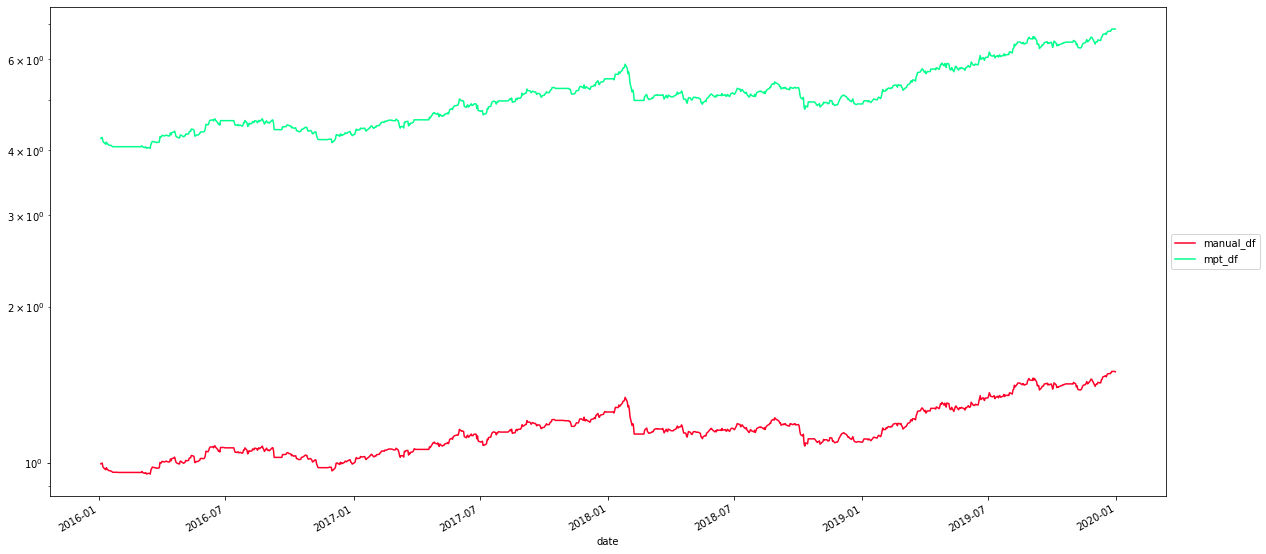

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.003299  0.003299
2019-12-26   0.010258  0.010258
2019-12-27  -0.000791 -0.000791
2019-12-30  -0.009065 -0.009065
2019-12-31  -0.003685 -0.001550

[1006 rows x 2 columns]


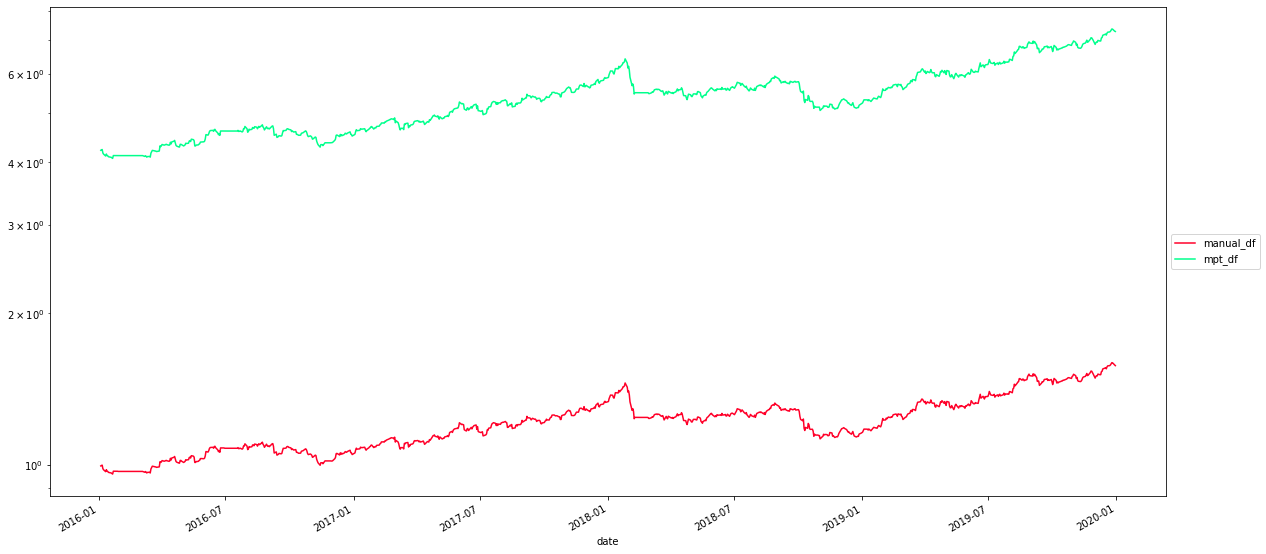

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.000000  0.000000
2019-12-26   0.000000  0.000000
2019-12-27   0.000000  0.000000
2019-12-30   0.000000  0.000000
2019-12-31  -0.001468  0.000000

[1006 rows x 2 columns]


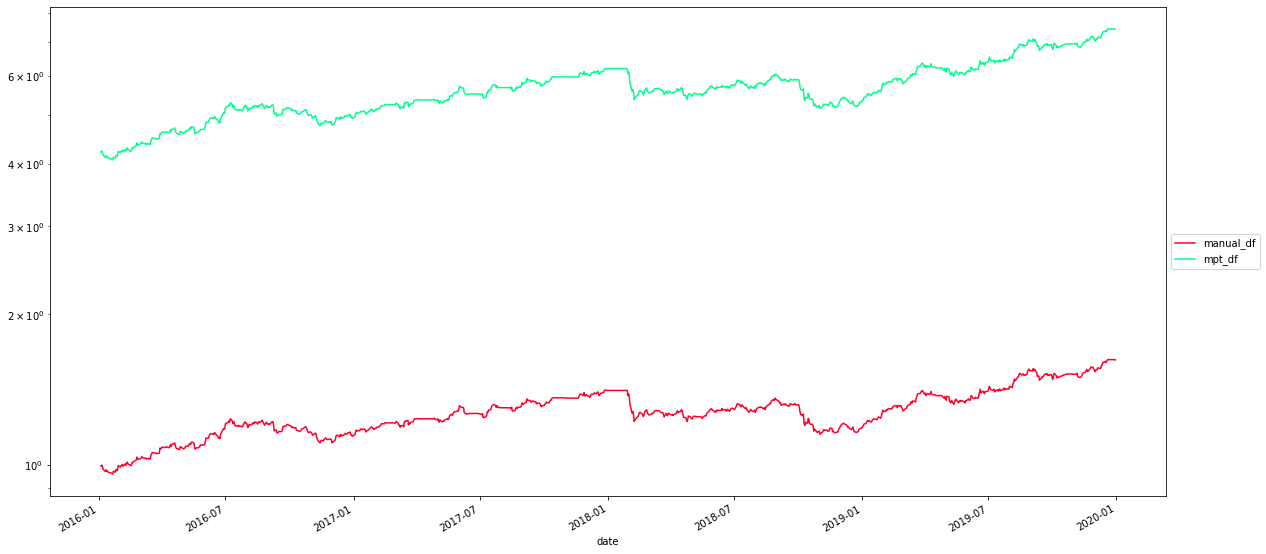

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.000000  0.000000
2019-12-26   0.000000  0.000000
2019-12-27   0.000000  0.000000
2019-12-30   0.000000  0.000000
2019-12-31  -0.001468  0.000000

[1006 rows x 2 columns]


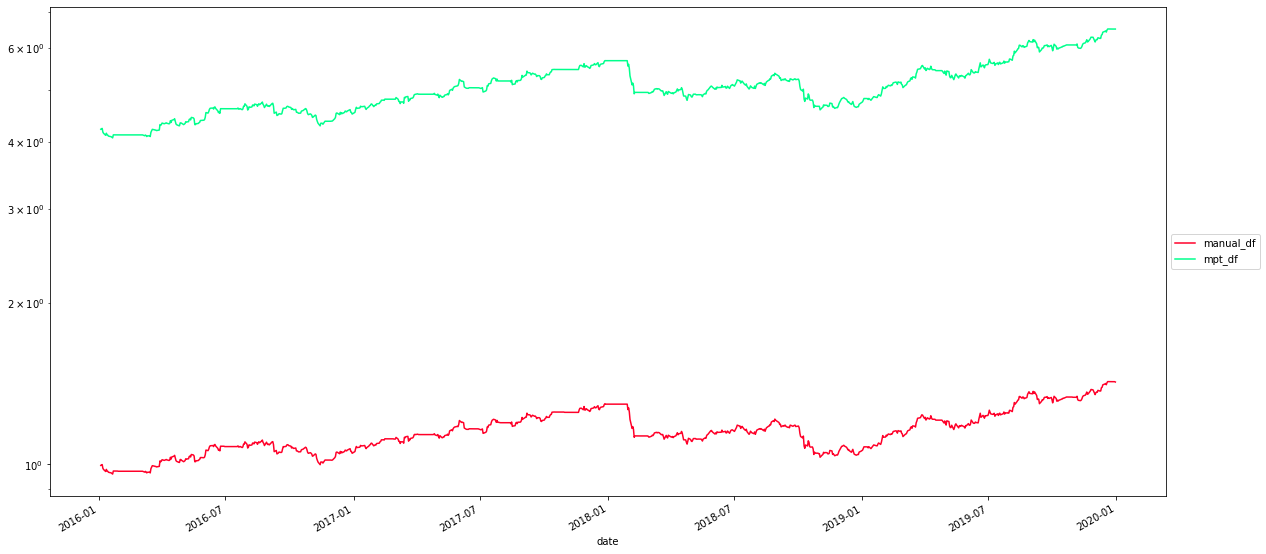

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.003299  0.003299
2019-12-26   0.010258  0.010258
2019-12-27  -0.000791 -0.000791
2019-12-30  -0.009065 -0.009065
2019-12-31  -0.003685 -0.001550

[1006 rows x 2 columns]


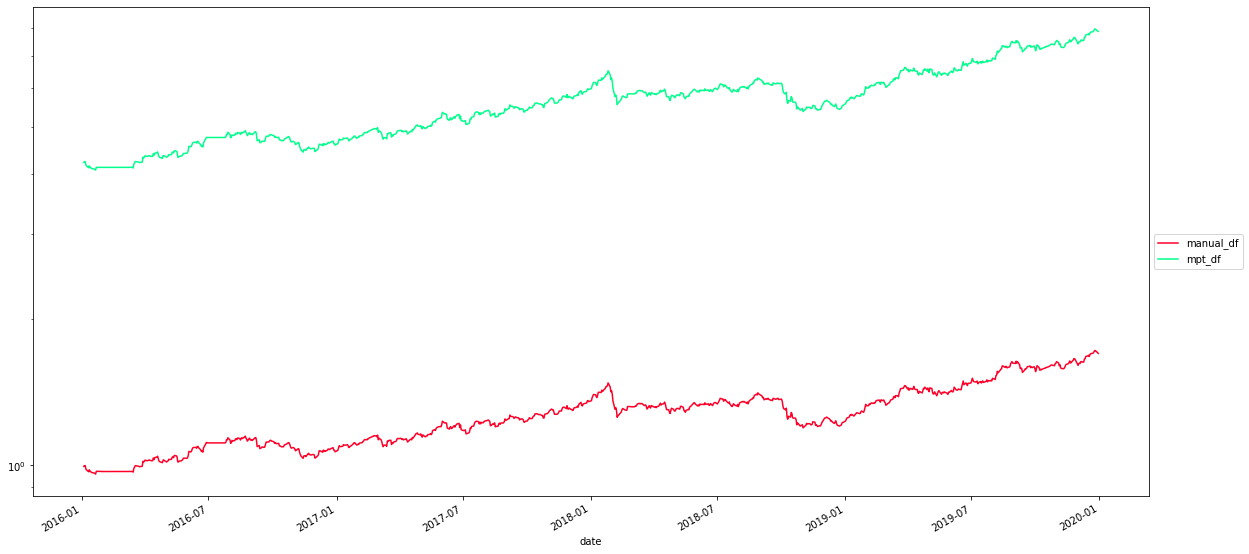

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.003299  0.003299
2019-12-26   0.010258  0.010258
2019-12-27  -0.000791 -0.000791
2019-12-30  -0.009065 -0.009065
2019-12-31  -0.002303 -0.000280

[1006 rows x 2 columns]


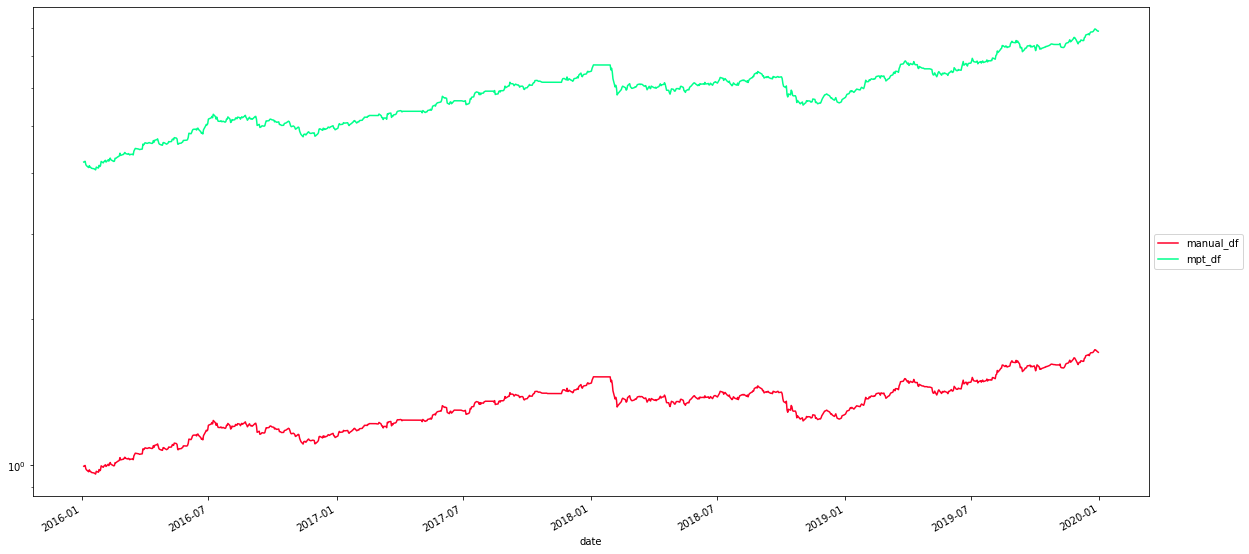

            manual_df    mpt_df
date                           
2016-01-04  -0.004940  3.223140
2016-01-05   0.002157  0.002157
2016-01-06   0.001254  0.001254
2016-01-07  -0.015764 -0.015764
2016-01-08  -0.005106 -0.005106
...               ...       ...
2019-12-24   0.003299  0.003299
2019-12-26   0.010258  0.010258
2019-12-27  -0.000791 -0.000791
2019-12-30  -0.009065 -0.009065
2019-12-31  -0.002303 -0.000280

[1006 rows x 2 columns]


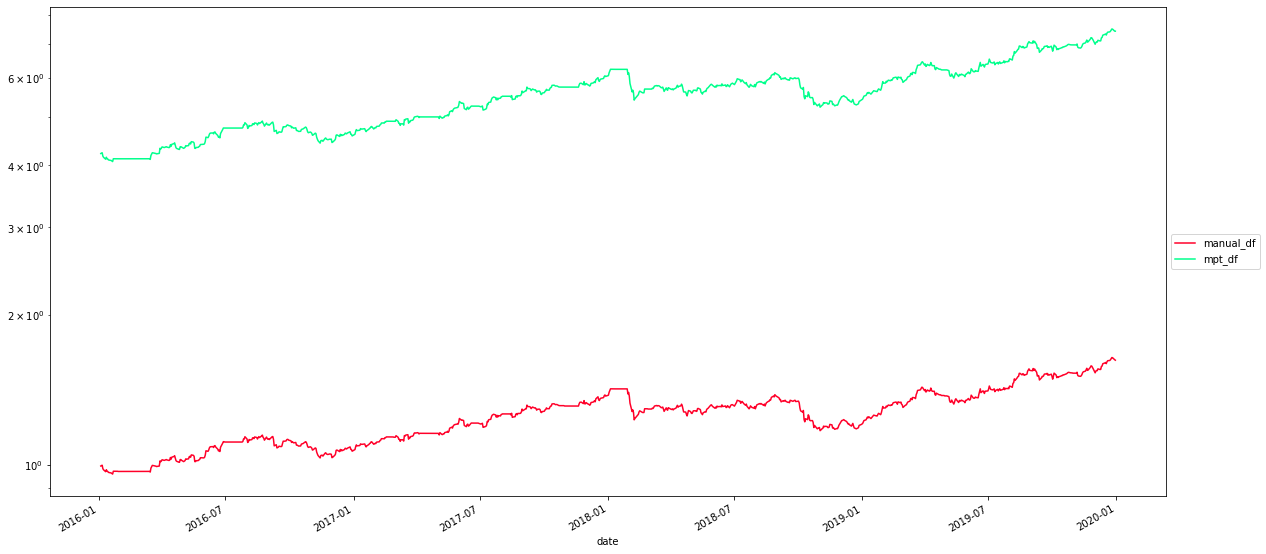

In [21]:
count = 0
for col in manual_df.columns[1:10]:
    count += 1
    df = pd.concat([manual_df[col], mpt_df[col]], axis=1)
    df.columns = ['manual_df', 'mpt_df']
    print(df)
    show_cum_ret(df)

    if count > 10:
        break


In [11]:
lookback_start = '2016'
lookback_end = '2018'
sim_year = '2019'

cal_manual_met_lookback = empy_metric(manual_df[lookback_start:lookback_end])
cal_manual_met_year = empy_metric(manual_df[sim_year])

cal_mpt_met_lookback = empy_metric(mpt_df[lookback_start:lookback_end])
cal_mpt_met_year = empy_metric(mpt_df[sim_year])

C:\Users\Sammi\AppData\Local\Temp\ipykernel_15904\2220410734.py:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cal_manual_met_year = empy_metric(manual_df[sim_year])
C:\Users\Sammi\AppData\Local\Temp\ipykernel_15904\2220410734.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cal_mpt_met_year = empy_metric(mpt_df[sim_year])


In [12]:
cal_met_lookback_diff = cal_manual_met_lookback - cal_mpt_met_lookback
cal_met_lookback_diff

,total_return,annual_return,sharpe_ratio,annual_volatility,max_drawdown,avg_drawdown,return/maxdd,return/avgdd
corr_avg__lb10__<0.23,-4.437942,-0.707845,0.061202,-1.743741,-0.015568,-0.004154,-4.051047,-13.481182
corr_avg__lb10__>0.62,-4.251688,-0.697950,-0.041891,-1.745612,-0.014945,-0.004581,-3.793114,-14.234083
corr_avg__lb10__out-of0.23&0.62,-4.120790,-0.688893,-0.078744,-1.751386,-0.014061,-0.004192,-4.015659,-13.463936
corr_avg__lb15__<0.26,-5.152343,-0.743878,0.483566,-1.748450,-0.003053,-0.003969,-5.020761,-17.508907
corr_avg__lb15__>0.58,-4.357971,-0.703884,0.024100,-1.746502,-0.015832,-0.004189,-4.465631,-16.861351
...,...,...,...,...,...,...,...,...
vol_std_pct__lb20__>0.18,-0.083781,-0.022535,-0.162795,-0.000171,-0.015807,-0.003928,-0.248640,-0.875065
vol_std_pct__lb20__out-of-0.16&0.18,-0.069868,-0.019615,-0.149473,-0.000224,-0.014227,-0.004476,-0.169933,-0.682031
vol_std_pct__lb50__<-0.06,-4.305610,-0.700287,-0.011316,-1.743522,-0.014994,-0.004709,-3.915138,-15.234366
vol_std_pct__lb50__>0.08,-5.476066,-0.759177,0.657393,-1.749545,-0.003782,-0.001975,-5.541265,-30.067227
